# testing do file on happiness and GDP

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

# import the data

In [89]:
# here we need to use happiness data from the world happiness report
# GDP figures from maddison report. 
# the data has been slightly cleaned? 

In [90]:
happy = pd.read_csv('happiness_with_continent(2019).csv',index_col='Country name')

In [91]:
happy.head()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,...,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,...,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,...,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [92]:
## the column names are pretty long 
## we should remember that we are using REAL GDP per capita 
happy= happy.rename(columns={'Log GDP per capita': 'gdppc', 'Life Ladder': 'happi'})
happy.head(n=2)

,Year,happi,gdppc,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2008,3.723590,7.16869,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Afghanistan,2009,4.401778,7.33379,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,...,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia


# Inspect the data

In [93]:
# need to get to know the data you're using
# students should note down some of the interesting stats from here. 

happy.describe()

,Year,happi,gdppc,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,...,643.000000,1502.000000,1335.000000,180.000000,125.000000,220.000000,618.000000,491.000000,630.000000,671.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,...,0.370000,0.385438,0.447771,0.226295,0.390480,0.283925,0.249574,0.268070,0.264336,0.237493
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,...,0.083232,0.082396,0.108505,0.119079,0.123309,0.113226,0.118126,0.145120,0.160169,0.157482
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,...,0.240000,0.211000,0.200969,0.066618,0.176535,0.066020,0.048720,0.075872,0.038242,0.031518
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,...,0.305000,0.321429,0.368424,0.139773,0.290300,0.223553,0.176876,0.155833,0.144976,0.118725
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,...,0.352000,0.371000,0.426541,0.198450,0.380174,0.292383,0.229924,0.232000,0.198380,0.193531
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,...,0.428000,0.432200,0.514803,0.281627,0.478149,0.341741,0.294242,0.385469,0.391370,0.335000
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,...,0.634000,0.626000,0.961435,0.640332,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


In [94]:
happy.shape

(1704, 26)

In [95]:
print(happy.iloc[0]['happi'])
print(happy.loc['Afghanistan'][['happi','gdppc']])

3.723589897
                 happi     gdppc
Country name                    
Afghanistan   3.723590  7.168690
Afghanistan   4.401778  7.333790
Afghanistan   4.758381  7.386629
Afghanistan   3.831719  7.415019
Afghanistan   3.782938  7.517126
Afghanistan   3.572100  7.522238
Afghanistan   3.130896  7.516955
Afghanistan   3.982855  7.500539
Afghanistan   4.220169  7.497038
Afghanistan   2.661718  7.497755
Afghanistan   2.694303  7.494588


In [96]:
## lets try a quick plot for 2018 data only
# first we need to only have 2018 data. 

happy = happy[happy['Year'] == 2018]

In [97]:
happy.head(n=2)

,Year,happi,gdppc,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,...,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,...,0.30325,0.456174,NaN,NaN,NaN,0.243243,0.232,NaN,NaN,Europe


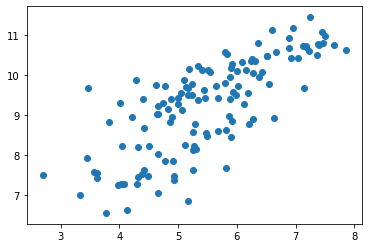

In [98]:
# now plot quick scatter 
plt.scatter(happy['happi'].values, happy['gdppc'].values)
plt.show()

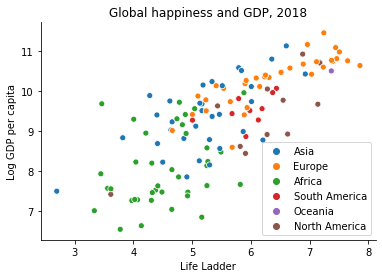

In [111]:
# we can now do something similar but making a distinction with continents. 
# seaborn is easier to use here

sns.scatterplot(
    x=happy['happi'].values,
    y=happy['gdppc'].values,  
    hue=happy['Continent'].values
)
plt.title('Global happiness and GDP, 2018')
plt.xlabel('Life Ladder')
# Set y-axis label
plt.ylabel('Log GDP per capita')
sns.despine() #neater layout